## Install and import all the required libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Import the Data set

In [2]:
quality_data = pd.read_csv("city_day.csv")
quality_data.head()
quality_data.shape
quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
quality_data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# Cleaning the Data

In [5]:
# Removing all the null values in the data set
quality_data = quality_data.fillna(quality_data.median(numeric_only=True))

In [6]:
quality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
# Changing the Date data type
quality_data['Date'] = pd.to_datetime(quality_data['Date'])
print(quality_data['Date'].dtype)

datetime64[ns]


# EDA

In [9]:
# creating a duplicate to perform operations
full_data = quality_data.copy()

# # Which cities have the highest average AQI and which have the lowest over the entire period?

In [10]:
city_aqi = full_data.groupby('City', as_index=False)['AQI'].mean()

# Sort descending for highest average AQI
highest_aqi = city_aqi.sort_values(by='AQI', ascending=False).head(10)

# Sort ascending for lowest average AQI
lowest_aqi = city_aqi.sort_values(by='AQI', ascending=True).head(10)

print("Top 10 cities with highest average AQI:")
print(highest_aqi)

print("\nTop 10 cities with lowest average AQI:")
print(lowest_aqi)

Top 10 cities with highest average AQI:
            City         AQI
0      Ahmedabad  339.861623
10         Delhi  258.783474
21         Patna  214.414962
19       Lucknow  212.200597
12      Gurugram  210.704586
23       Talcher  159.417297
16    Jorapokhar  145.207015
6   Brajrajnagar  142.537313
13      Guwahati  139.802789
18       Kolkata  138.902948

Top 10 cities with lowest average AQI:
                  City         AQI
1               Aizawl   36.238938
22            Shillong   75.541935
9           Coimbatore   77.917098
24  Thiruvananthapuram   78.151079
11           Ernakulam   93.783951
4            Bengaluru   95.485316
7           Chandigarh   96.851974
2            Amaravati   97.925342
17               Kochi  104.623457
14           Hyderabad  109.759721


# How do major pollutants correlate with each other?

In [12]:
pollutant_cols = ['PM2.5','PM10','NO2','SO2','CO','O3','NO','NOx','NH3','Benzene','Toluene','Xylene']
pollutant_data = full_data[pollutant_cols]

# Compute correlation matrix
corr_matrix = pollutant_data.corr()

print("Correlation matrix between major pollutants:")
print(corr_matrix)


Correlation matrix between major pollutants:
            PM2.5      PM10       NO2       SO2        CO        O3        NO  \
PM2.5    1.000000  0.520767  0.358287  0.120451  0.093695  0.166064  0.435245   
PM10     0.520767  1.000000  0.352396  0.165468  0.023932  0.208398  0.433864   
NO2      0.358287  0.352396  1.000000  0.388413  0.361750  0.289435  0.465848   
SO2      0.120451  0.165468  0.388413  1.000000  0.476784  0.160489  0.174881   
CO       0.093695  0.023932  0.361750  0.476784  1.000000  0.043311  0.221445   
O3       0.166064  0.208398  0.289435  0.160489  0.043311  1.000000  0.020788   
NO       0.435245  0.433864  0.465848  0.174881  0.221445  0.020788  1.000000   
NOx      0.375938  0.416523  0.581938  0.205912  0.231878  0.089095  0.747409   
NH3      0.164615  0.200548  0.151731 -0.048679 -0.014252  0.076295  0.155804   
Benzene  0.030539  0.027522  0.042179  0.038955  0.066022  0.023982  0.045202   
Toluene  0.132609  0.126400  0.297913  0.273314  0.285559  0.135

# How has the average AQI changed over the years for all cities combined?

In [13]:
# Extract the year
full_data['Year'] = full_data['Date'].dt.year

# Group by Year and calculate mean AQI for all cities combined
yearly_aqi = full_data.groupby('Year')['AQI'].mean().reset_index()

print("Average AQI by Year (all cities combined):")
print(yearly_aqi)

Average AQI by Year (all cities combined):
   Year         AQI
0  2015  179.615137
1  2016  176.554629
2  2017  161.777138
3  2018  175.217277
4  2019  154.578297
5  2020  113.737624


# Are there seasonal patterns (monthly variation) in pollutants like PM2.5 and PM10?

In [14]:
full_data['Month'] = full_data['Date'].dt.month
monthly_pollutants = full_data.groupby('Month')[['PM2.5', 'PM10']].mean().reset_index()
print("Monthly average of PM2.5 and PM10:")
print(monthly_pollutants)

Monthly average of PM2.5 and PM10:
    Month       PM2.5        PM10
0       1   96.850511  140.187451
1       2   77.658567  130.251368
2       3   61.832103  109.728796
3       4   52.052365  101.933779
4       5   50.924807  101.907689
5       6   44.244176   89.439281
6       7   39.522550   81.859162
7       8   36.618639   81.117324
8       9   40.083419   83.423488
9      10   70.799713  113.534242
10     11  103.211454  141.368655
11     12  101.964496  139.447227


# Which cities show improvement in AQI over time, and which are getting worse?

In [15]:
full_data['Year'] = full_data['Date'].dt.year
city_year_aqi = full_data.groupby(['City', 'Year'])['AQI'].mean().reset_index()
improvement_df = city_year_aqi.groupby('City').apply(
    lambda x: x.sort_values('Year')['AQI'].iloc[-1] - x.sort_values('Year')['AQI'].iloc[0]
).reset_index(name='AQI_Change')
improvement_df['Trend'] = improvement_df['AQI_Change'].apply(lambda x: 'Improving' if x < 0 else 'Worsening')

print("Cities Improvement/Worsening based on AQI:")
print(improvement_df.sort_values('AQI_Change'))

Cities Improvement/Worsening based on AQI:
                  City  AQI_Change      Trend
2            Amaravati -130.672850  Improving
10               Delhi -115.352526  Improving
7           Chandigarh  -63.316669  Improving
8              Chennai  -60.685620  Improving
14           Hyderabad  -58.924584  Improving
3             Amritsar  -49.759882  Improving
5               Bhopal  -47.259717  Improving
15              Jaipur  -47.223065  Improving
21               Patna  -43.771998  Improving
6         Brajrajnagar  -39.206120  Improving
4            Bengaluru  -34.032098  Improving
18             Kolkata  -29.603414  Improving
19             Lucknow  -26.416783  Improving
0            Ahmedabad  -19.707733  Improving
25       Visakhapatnam  -19.676111  Improving
20              Mumbai  -14.431694  Improving
24  Thiruvananthapuram  -12.570695  Improving
22            Shillong  -10.139581  Improving
9           Coimbatore   -4.507739  Improving
17               Kochi    0.000000  W

# Which pollutant contributes the most to poor AQI levels in each city?

In [16]:
pollutants = ['PM2.5','PM10','NO2','SO2','CO','O3','NO','NOx','NH3','Benzene','Toluene','Xylene']
city_pollutants_mean = full_data.groupby('City')[pollutants].mean()
city_pollutants_mean['Dominant_Pollutant'] = city_pollutants_mean[pollutants].idxmax(axis=1)
city_pollutants_mean = city_pollutants_mean.reset_index()
city_pollutants_mean[['City', 'Dominant_Pollutant']]


,City,Dominant_Pollutant
0,Ahmedabad,PM10
1,Aizawl,PM10
2,Amaravati,PM10
3,Amritsar,PM10
4,Bengaluru,PM10
5,Bhopal,PM10
6,Brajrajnagar,PM10
7,Chandigarh,PM10
8,Chennai,PM10
9,Coimbatore,PM10


# Which cities recorded the highest spikes (max values) in PM2.5 or AQI during the time period?

In [17]:
highest_pm25_spikes = full_data.loc[full_data['PM2.5'].idxmax()]
print("City with highest PM2.5 spike:")
print(highest_pm25_spikes[['City', 'Date', 'PM2.5']])

# top 10 spikes overall for PM2.5:
top10_pm25_spikes = full_data[['City', 'Date', 'PM2.5']].sort_values(by='PM2.5', ascending=False).head(10)
print("\nTop 10 PM2.5 spikes:")
print(top10_pm25_spikes)

# Highest AQI spikes (Top 10)
highest_aqi_spike = full_data.loc[full_data['AQI'].idxmax()]
print("\nCity with highest AQI spike:")
print(highest_aqi_spike[['City', 'Date', 'AQI']])

# Top 10 AQI spikes
top10_aqi_spikes = full_data[['City', 'Date', 'AQI']].sort_values(by='AQI', ascending=False).head(10)
print("\nTop 10 AQI spikes:")
print(top10_aqi_spikes)

City with highest PM2.5 spike:
City                Gurugram
Date     2017-08-29 00:00:00
PM2.5                 949.99
Name: 13041, dtype: object

Top 10 PM2.5 spikes:
           City       Date   PM2.5
13041  Gurugram 2017-08-29  949.99
25729  Shillong 2019-09-03  917.77
14156  Guwahati 2019-05-04  916.67
12504  Gurugram 2016-03-10  914.94
25728  Shillong 2019-09-02  914.64
12511  Gurugram 2016-03-17  894.75
3143   Amritsar 2017-05-08  868.66
13011  Gurugram 2017-07-30  858.73
3145   Amritsar 2017-05-10  832.80
12990  Gurugram 2017-07-09  821.42

City with highest AQI spike:
City              Ahmedabad
Date    2018-02-19 00:00:00
AQI                  2049.0
Name: 1145, dtype: object

Top 10 AQI spikes:
           City       Date     AQI
1145  Ahmedabad 2018-02-19  2049.0
1136  Ahmedabad 2018-02-10  1917.0
560   Ahmedabad 2016-07-14  1842.0
1048  Ahmedabad 2017-11-14  1747.0
1463  Ahmedabad 2019-01-03  1719.0
1417  Ahmedabad 2018-11-18  1672.0
1420  Ahmedabad 2018-11-21  1646.0
1407  Ah

# How do metro cities (Delhi, Mumbai, Kolkata, etc.) compare to non-metro cities in terms of average AQI?

In [18]:
# Define metro cities list
metro_cities = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Bengaluru', 'Hyderabad', 'Pune']

# New column to tag metro vs non-metro
full_data['City_Type'] = full_data['City'].apply(lambda x: 'Metro' if x in metro_cities else 'Non-Metro')

# Group by City_Type and calculate average AQI
city_type_aqi = full_data.groupby('City_Type')['AQI'].mean().reset_index()

print("Average AQI comparison between Metro and Non-Metro cities:")
print(city_type_aqi)

# Per-city comparison within each group:
per_city_aqi = full_data.groupby(['City_Type', 'City'])['AQI'].mean().reset_index()
print("\nAverage AQI for each city (grouped by Metro/Non-Metro):")
print(per_city_aqi)

Average AQI comparison between Metro and Non-Metro cities:
   City_Type         AQI
0      Metro  138.421518
1  Non-Metro  170.617082

Average AQI for each city (grouped by Metro/Non-Metro):
    City_Type                City         AQI
0       Metro           Bengaluru   95.485316
1       Metro             Chennai  114.720259
2       Metro               Delhi  258.783474
3       Metro           Hyderabad  109.759721
4       Metro             Kolkata  138.902948
5       Metro              Mumbai  113.120956
6   Non-Metro           Ahmedabad  339.861623
7   Non-Metro              Aizawl   36.238938
8   Non-Metro           Amaravati   97.925342
9   Non-Metro            Amritsar  119.771499
10  Non-Metro              Bhopal  132.262976
11  Non-Metro        Brajrajnagar  142.537313
12  Non-Metro          Chandigarh   96.851974
13  Non-Metro          Coimbatore   77.917098
14  Non-Metro           Ernakulam   93.783951
15  Non-Metro            Gurugram  210.704586
16  Non-Metro            Gu

# What is the distribution of AQI_Bucket categories (Good, Moderate, Poor, etc.) across all cities?

In [19]:
# Count the number of occurrences of each AQI_Bucket category
aqi_bucket_distribution = full_data['AQI_Bucket'].value_counts().reset_index()
aqi_bucket_distribution.columns = ['AQI_Bucket', 'Count']

print("Distribution of AQI_Bucket categories across all cities:")
print(aqi_bucket_distribution)

# % distribution:
aqi_bucket_distribution['Percentage'] = (aqi_bucket_distribution['Count'] / len(full_data) * 100).round(2)

print("\nWith Percentage Distribution:")
print(aqi_bucket_distribution)


Distribution of AQI_Bucket categories across all cities:
     AQI_Bucket  Count
0      Moderate   8829
1  Satisfactory   8224
2          Poor   2781
3     Very Poor   2337
4          Good   1341
5        Severe   1338

With Percentage Distribution:
     AQI_Bucket  Count  Percentage
0      Moderate   8829       29.90
1  Satisfactory   8224       27.85
2          Poor   2781        9.42
3     Very Poor   2337        7.91
4          Good   1341        4.54
5        Severe   1338        4.53


# What are the top 10 most polluted days across all cities and which cities did they occur in?

In [20]:
# Sort the dataset by AQI in descending order
top10_polluted_days = full_data[['City', 'Date', 'AQI']].sort_values(by='AQI', ascending=False).head(10)

print("Top 10 most polluted days across all cities:")
print(top10_polluted_days)

Top 10 most polluted days across all cities:
           City       Date     AQI
1145  Ahmedabad 2018-02-19  2049.0
1136  Ahmedabad 2018-02-10  1917.0
560   Ahmedabad 2016-07-14  1842.0
1048  Ahmedabad 2017-11-14  1747.0
1463  Ahmedabad 2019-01-03  1719.0
1417  Ahmedabad 2018-11-18  1672.0
1420  Ahmedabad 2018-11-21  1646.0
1407  Ahmedabad 2018-11-08  1630.0
1127  Ahmedabad 2018-02-01  1613.0
1746  Ahmedabad 2019-10-13  1595.0


In [21]:
# --- Combined Table for Top Polluted Days (AQI & PM2.5) ---

# Select the columns of interest
cols = ['City', 'Date', 'AQI', 'PM2.5']

# Sort the data by AQI and pick top 10
top10_combined = full_data[cols].sort_values(by='AQI', ascending=False).head(10)

# Rank column for clarity
top10_combined['Rank'] = range(1, len(top10_combined) + 1)

# Reorder columns to show Rank first
top10_combined = top10_combined[['Rank', 'City', 'Date', 'AQI', 'PM2.5']]

print("Top 10 most polluted days across all cities (combined view):")
print(top10_combined)


Top 10 most polluted days across all cities (combined view):
      Rank       City       Date     AQI   PM2.5
1145     1  Ahmedabad 2018-02-19  2049.0  242.66
1136     2  Ahmedabad 2018-02-10  1917.0  185.77
560      3  Ahmedabad 2016-07-14  1842.0   38.13
1048     4  Ahmedabad 2017-11-14  1747.0  207.19
1463     5  Ahmedabad 2019-01-03  1719.0  131.50
1417     6  Ahmedabad 2018-11-18  1672.0  127.46
1420     7  Ahmedabad 2018-11-21  1646.0   86.52
1407     8  Ahmedabad 2018-11-08  1630.0  205.21
1127     9  Ahmedabad 2018-02-01  1613.0  189.12
1746    10  Ahmedabad 2019-10-13  1595.0  194.36


# Visualizations

###  Top 10 Cities with Highest Average AQI

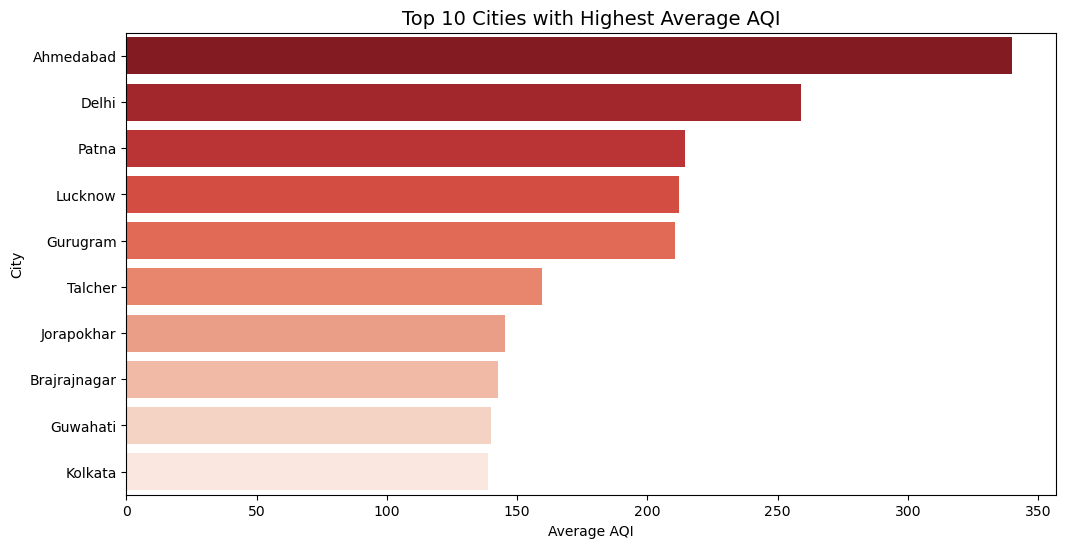

In [22]:
city_aqi = full_data.groupby('City', as_index=False)['AQI'].mean()
top10_cities = city_aqi.sort_values(by='AQI', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='AQI', y='City', data=top10_cities, palette='Reds_r')
plt.title('Top 10 Cities with Highest Average AQI', fontsize=14)
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.show()

### Pollutant Correlation Heatmap

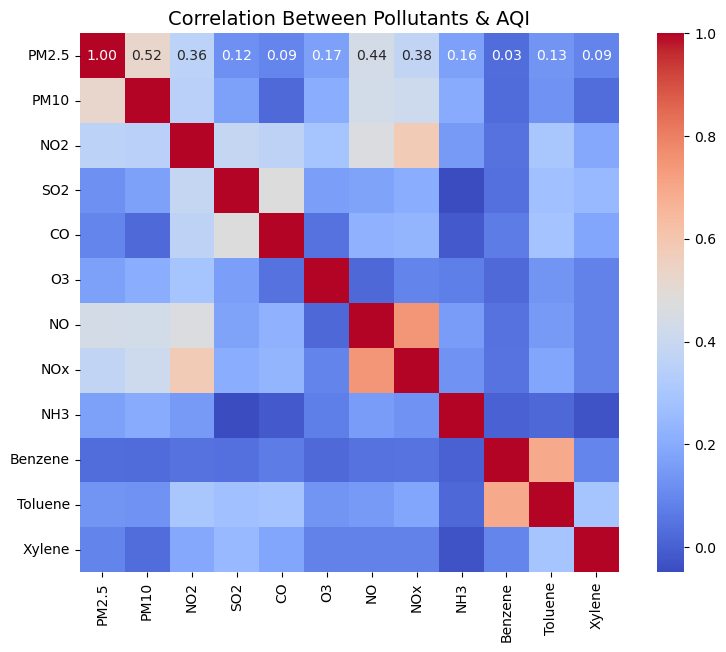

In [23]:
pollutants = ['PM2.5','PM10','NO2','SO2','CO','O3','NO','NOx','NH3','Benzene','Toluene','Xylene']
corr_matrix = full_data[pollutants].corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Between Pollutants & AQI', fontsize=14)
plt.show()

### AQI Trend Over Years

C:\Users\KOWSHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KOWSHAL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


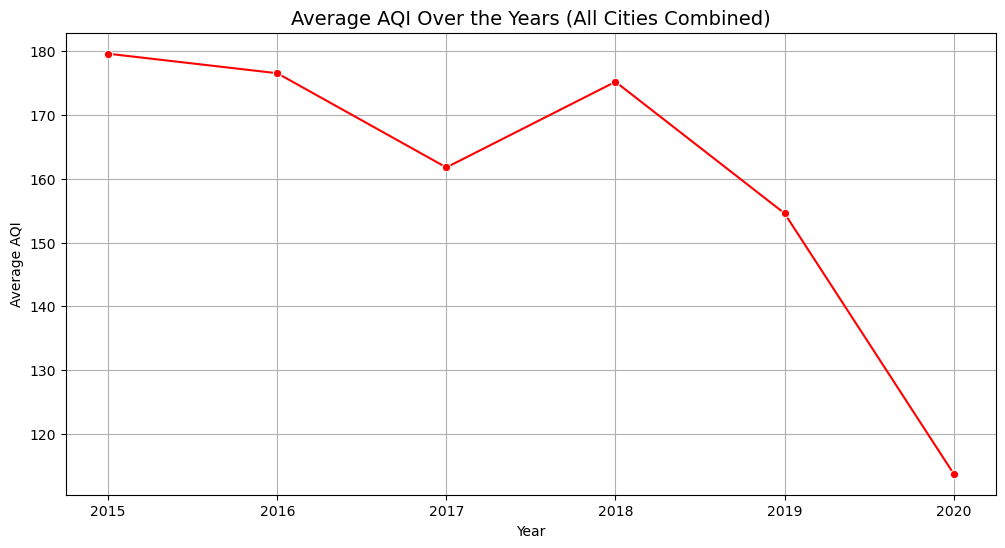

In [30]:
full_data.replace([np.inf, -np.inf], np.nan, inplace=True)
full_data['Year'] = full_data['Date'].dt.year
yearly_aqi = full_data.groupby('Year', as_index=False)['AQI'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='AQI', data=yearly_aqi, marker='o', color='red')
plt.title('Average AQI Over the Years (All Cities Combined)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average AQI')
plt.grid(True)
plt.show()

### Monthly Seasonality of PM2.5 & PM10

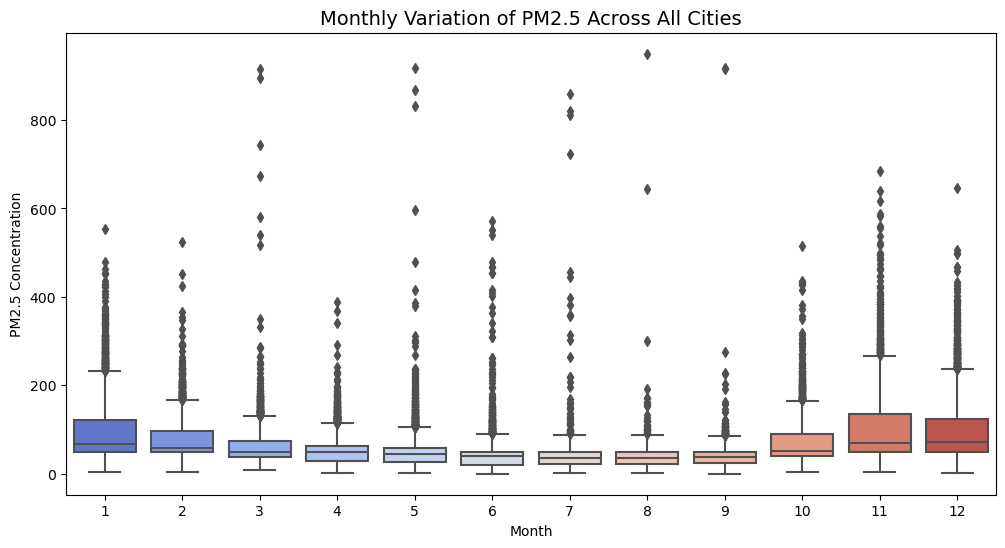

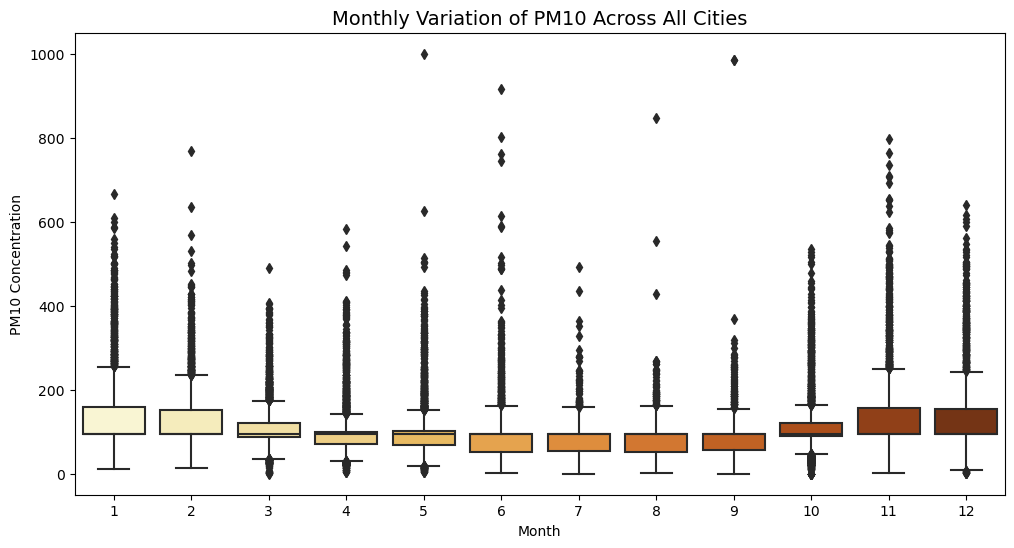

In [31]:
full_data['Month'] = full_data['Date'].dt.month
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='PM2.5', data=full_data, palette='coolwarm')
plt.title('Monthly Variation of PM2.5 Across All Cities', fontsize=14)
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration')
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(x='Month', y='PM10', data=full_data, palette='YlOrBr')
plt.title('Monthly Variation of PM10 Across All Cities', fontsize=14)
plt.xlabel('Month')
plt.ylabel('PM10 Concentration')
plt.show()

### Distribution of AQI Categories

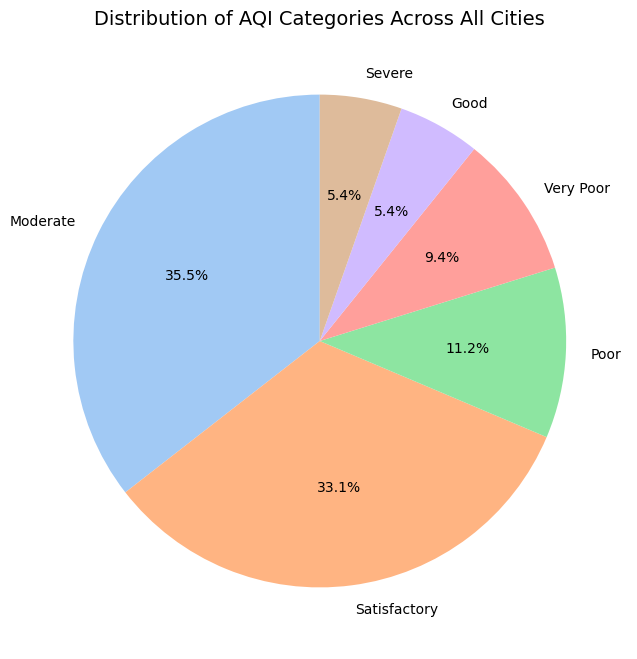

In [32]:
aqi_bucket_counts = full_data['AQI_Bucket'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(aqi_bucket_counts, labels=aqi_bucket_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of AQI Categories Across All Cities', fontsize=14)
plt.show()

## 📝 Final Summary  

In this project, I analyzed city-level air quality data across India to uncover patterns, trends, and correlations among key pollutants and AQI levels.  
By cleaning the dataset, handling missing values, and performing exploratory data analysis (EDA), I answered 10 critical questions and built 5 impactful visualizations, including:

- **Top Cities with Highest AQI** (bar chart)  
- **Correlation between Pollutants and AQI** (heatmap)  
- **Yearly AQI Trend** (line chart)  
- **Monthly Seasonal Variation of PM2.5 and PM10** (boxplots)  
- **Distribution of AQI Categories Across Cities** (pie chart)  

### Key Insights  
- Identified the cities consistently exhibiting the highest AQI levels.  
- Discovered strong correlations between specific pollutants and AQI values.  
- Observed distinct seasonal patterns of pollution across months.  

This analysis highlights the importance of continuous air quality monitoring and provides a baseline for data-driven environmental decisions.  